In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

from sqlalchemy.orm import aliased

m = aliased(Measurement)
s = aliased(Station)
recent = session.query(func.max(m.date)).scalar()
print(f"Recent date: {recent}")


Recent date: 2017-08-23


In [10]:
from sqlalchemy.orm import aliased
m = aliased(Measurement)
s = aliased(Station)
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= query_date).all()

prcp_data = {date: prcp for date, prcp in results}
print(prcp_data)

{'2016-08-23': 0.7, '2016-08-24': 1.45, '2016-08-25': 0.11, '2016-08-26': 0.01, '2016-08-27': None, '2016-08-28': 2.07, '2016-08-29': 0.9, '2016-08-30': 0.05, '2016-08-31': 2.46, '2016-09-01': 0.01, '2016-09-02': 0.03, '2016-09-03': 1.0, '2016-09-04': 0.44, '2016-09-05': 0.18, '2016-09-06': 1.0, '2016-09-07': 1.35, '2016-09-08': 0.15, '2016-09-09': 0.35, '2016-09-10': 1.16, '2016-09-11': 0.6, '2016-09-12': 1.04, '2016-09-13': 1.2, '2016-09-14': 6.7, '2016-09-15': 3.35, '2016-09-16': 0.61, '2016-09-17': 0.23, '2016-09-18': 0.42, '2016-09-19': 0.25, '2016-09-20': 0.43, '2016-09-21': 1.02, '2016-09-22': 0.75, '2016-09-23': 0.33, '2016-09-24': 0.27, '2016-09-25': 0.04, '2016-09-26': 1.02, '2016-09-27': 1.0, '2016-09-28': 0.05, '2016-09-29': 1.49, '2016-09-30': 0.38, '2016-10-01': 1.02, '2016-10-02': 0.61, '2016-10-03': 0.46, '2016-10-04': 3.46, '2016-10-05': 0.81, '2016-10-06': 0.04, '2016-10-07': 0.01, '2016-10-08': 0.04, '2016-10-09': 0.0, '2016-10-10': 0.0, '2016-10-11': 0.35, '2016-10-

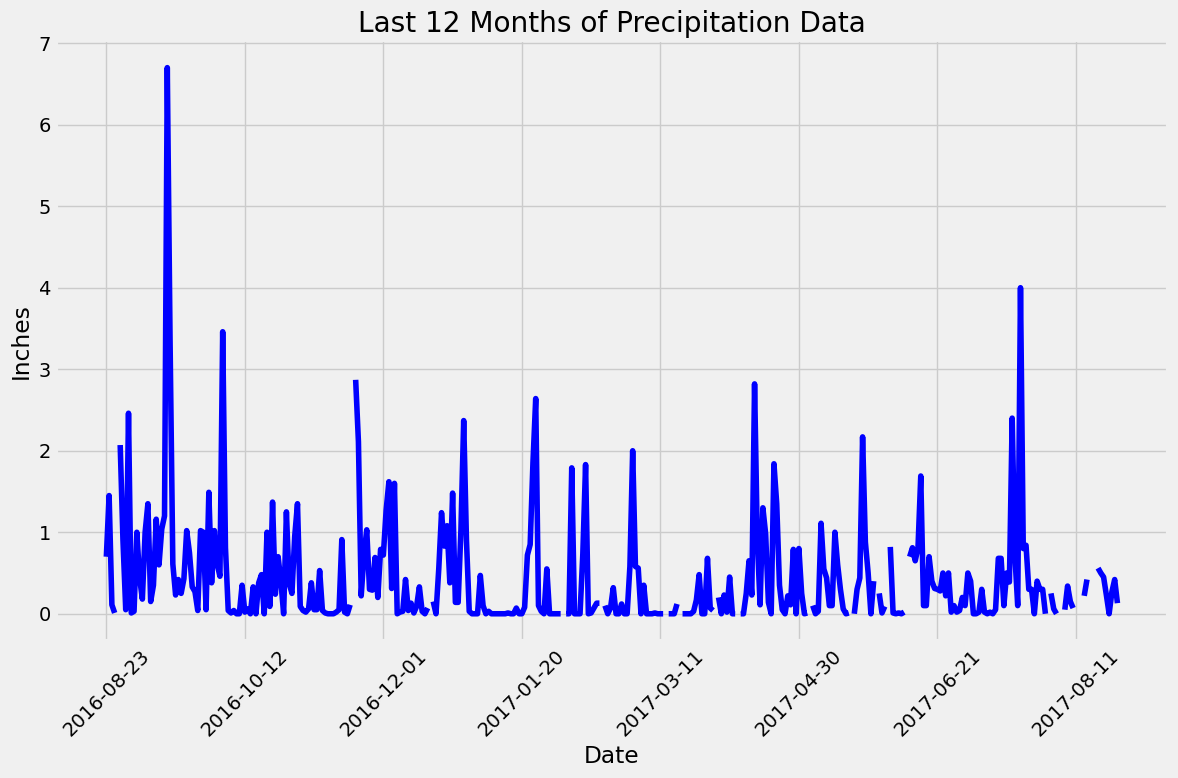

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert dictionary to Pandas DataFrame
df = pd.DataFrame.from_dict(prcp_data, orient='index', columns=['prcp'])
#plot last 12 months of precipitation data
plt.style.use('fivethirtyeight')
df.plot(figsize=(12, 8), rot=45, legend=False, xlabel='Date', ylabel='Inches',
        title='Last 12 Months of Precipitation Data', color='blue')

plt.tight_layout()
plt.show()


2017-08-23
2016-08-23
            prcp
date            
2010-01-01  0.08
2010-01-02  0.00
2010-01-03  0.00
2010-01-04  0.00
2010-01-06   NaN
...          ...
2017-08-19  0.09
2017-08-20   NaN
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[19550 rows x 1 columns]


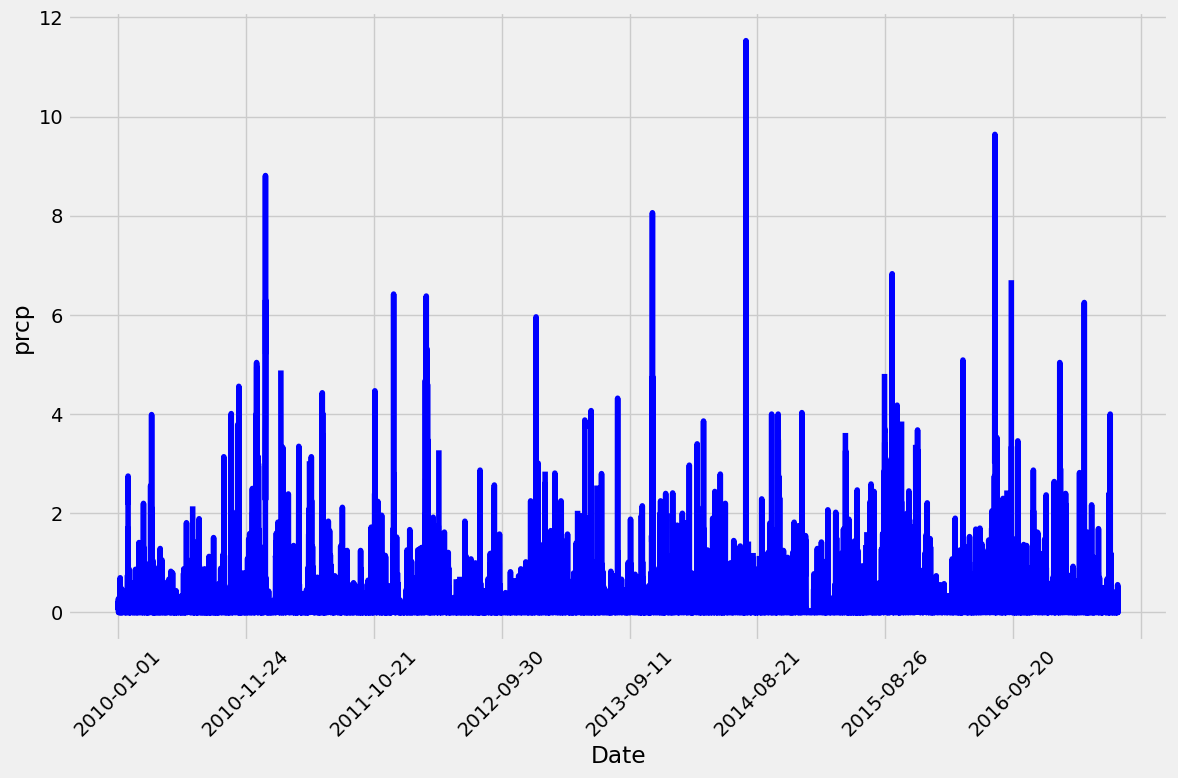

In [12]:
# Starting from the most recent data point in the database. 

most_recent_data = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(most_recent_data)
# Calculate the date one year from the last date in data set.
query_date = dt.datetime.strptime(most_recent_data, '%Y-%m-%d') - dt.timedelta(days=365)
query_date = query_date.date()
print(query_date)
# Perform a query to retrieve the data and precipitation scores
result = session.query(Measurement.date, Measurement.prcp).all()
#print(result)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(result, columns = ["date", 'prcp'])
df.set_index('date', inplace=True)
print(df)
# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

df.plot(figsize=(12, 8), rot=45, legend=False, xlabel='Date', ylabel='prcp', color='blue')

plt.tight_layout()
plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stat = df['prcp'].describe()
print(summary_stat)

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(func.count(Measurement.station)).scalar()
print(total_stations)

19550


In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
for station in active_station:
    print(active_station)
df = pd.DataFrame([{'station': row[0], 'count': row[1]} for row in active_station])
              
print(df)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]
[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517

In [40]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = 'USC00519281'
station = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(Measurement.station == active_station).all()
print(f"The lowest, highest and average temperature from active station {station}")

The lowest, highest and average temperature from active station [(54.0, 85.0, 71.66378066378067)]


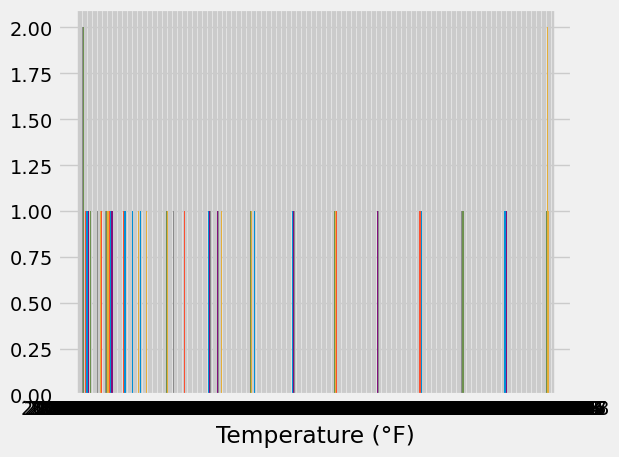

In [47]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station = 'USC00519281'
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).filter_by(station=active_station).first()[0]
query_date = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)

temperature = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == active_station).filter(Measurement.date >= query_date).all()
df = pd.DataFrame(temperature, columns=['date', 'tobs'])

plt.hist(temperature,bins=12, label='tobs')
plt.xlabel("Temperature (°F)")
plt.tight_layout()
plt.show()


# Close session

In [48]:
# Close Session
session.close()